In [27]:
import sys
sys.path.append("../../..")
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from func.grn_tpm import text_bn_graph, iit_tpm_cal

In [46]:
colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#9B76B2', "#B99523", "#27B5AF", "#1E90FF", "#87CEEB"]

def decimal_to_binary(decimal, min_length=1):
    if min_length == 0:
        return ''
    if decimal == 0:
        return "0" if min_length == 1 else "0".zfill(min_length)
    binary = ""
    while decimal > 0:
        binary = str(decimal % 2) + binary
        decimal = decimal // 2
    # 使用 zfill 确保二进制字符串至少有 min_length 长度
    return binary.zfill(min_length)

def tpm_series2(tpm, init_state, steps):
    init_num = int(init_state, 2)
    serie = [init_num]
    serie_str = [init_state]
    for t in range(steps):
        num = serie[t]
        probabilities = tpm[num, :]
        sample = np.random.choice(range(len(probabilities)), p=probabilities)
        serie.append(sample)
        serie_str.append(decimal_to_binary(sample, min_length=int(np.log2(len(probabilities)))))
    return serie, serie_str

def serie_plot2(tpm, mech_size, en_size, en_series, init='111', leg=False, figure_show=True, color="black"):
    colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#9B76B2', "#B99523", "#27B5AF", "#1E90FF", "#87CEEB"]
    un_sys, un_en, syn, expansive, introverted, tpm_dic = iit_tpm_cal(tpm, mech_size=mech_size, en_size=en_size, dis=True)   
    strs = [decimal_to_binary(i, min_length=mech_size) for i in range(2**mech_size)] 
    long_serie = []
    init_state = init
    mark_serie = []
    mark = 0
    for en_list in en_series:
        en_state = en_list[0]
        steps = len(en_list)
        mark += steps
        mark_serie.append(mark)
        serie, serie_str = tpm_series2(tpm_dic[en_state], init_state, steps)
        init_state = serie_str[-1]
        long_serie += serie[:-1]
        
    if figure_show:
        fig, ax = plt.subplots(figsize=(10,4), dpi=150)

    
        for ind,mark in enumerate(mark_serie):
            plt.scatter([mark], [7], marker='o', color=colors[ind], alpha=0.5, s=20)
            plt.plot([mark, mark], [7, -0.15], color=colors[ind], alpha=0.2)
            color_fill = colors[2] if mark % 20 == 0 else colors[3]
            ax.fill_between([mark-10, mark], 0, 7, color=color_fill, alpha=0.1)
            
        ax.plot(range(len(long_serie)), long_serie, label='init_state:'+init, color=color)
        ax.set_xlabel('Time')
        ax.set_ylabel('System state')
        
        # 设置y轴的标签
        ax.set_yticks(range(8))
        ax.set_yticklabels(strs)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        if leg:
            plt.legend(by_label.values(), by_label.keys(), loc=[1.01, 0])
        #plt.title(name + '_syn=' + str(round(syn,4)))
        plt.ylim([-0.15,7.15])
        plt.show()
        
    return un_sys, un_en, syn, expansive, introverted, long_serie
        

def generate_random_sequence(n, length):
    result = []
    while len(result) < length:
        num = random.randint(0, n)
        if num not in result:
            result.append(num)
    return result

In [31]:
#实验组
un, un_en, syn, tpm1, _ = text_bn_graph(folder = 'cellcollective/', textfile = 'Signaling in Macrophage Activation_18433497.txt', candidate_sys=[57, 105, 8], noise=0)

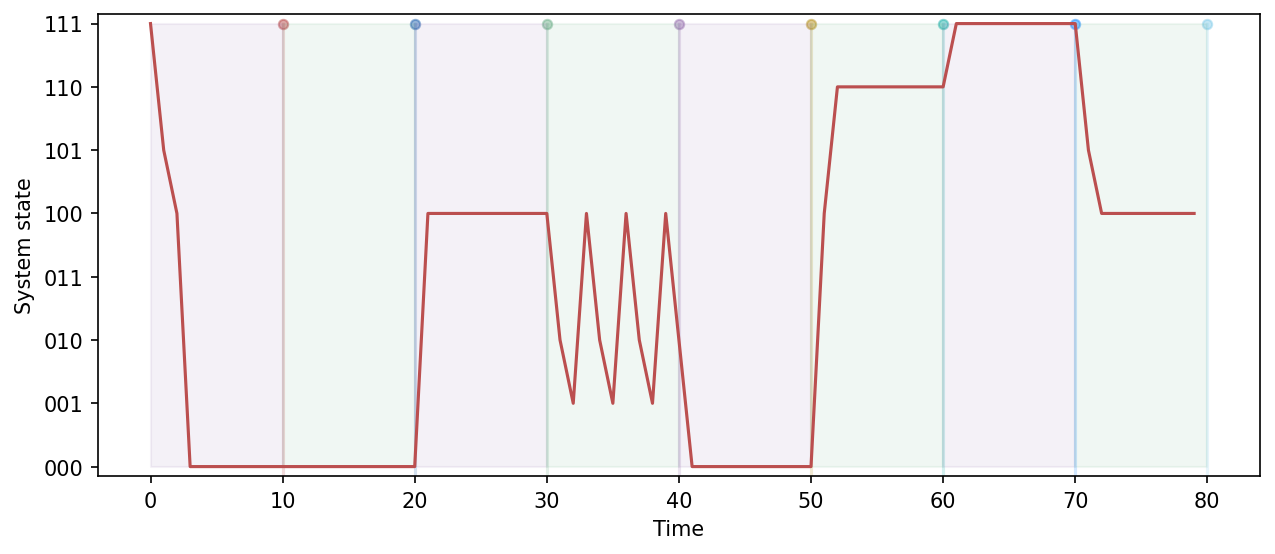

In [47]:
import random
seed = 42
np.random.seed(seed)
random.seed(seed)
n = 10
e_len = 3
en_ls0 = generate_random_sequence(2**e_len-1, 8)
en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]


#en_series = [[decimal_to_binary(3, min_length=e_len) for _ in range(n)], [decimal_to_binary(11, min_length=e_len) for _ in range(n)], [decimal_to_binary(35, min_length=e_len) for _ in range(n)]]
un_sys, un_en, syn, expansive, introverted, long_serie = serie_plot2(tpm1, mech_size=3, en_size=e_len, en_series=en_series, init='111', leg=False, figure_show=True, color="#BB4F4F")

In [110]:
expansive, introverted

(2.0547451650813215, -2.054745165081322)

In [48]:
#对照组
#un, un_en, syn, tpm2, _, _, _, _ = text_bn_graph(folder = 'cellcollective/', textfile = 'Tumour Cell Invasion and Migration_26528548.txt', candidate_sys=[7,27,12], fill_onenode=True, noise=0, save_onenote = False)
un, un_en, syn, tpm2, _ = text_bn_graph(folder = 'cellcollective/', textfile = 'Tumour Cell Invasion and Migration_26528548.txt', candidate_sys=[26,16,25], noise=0)

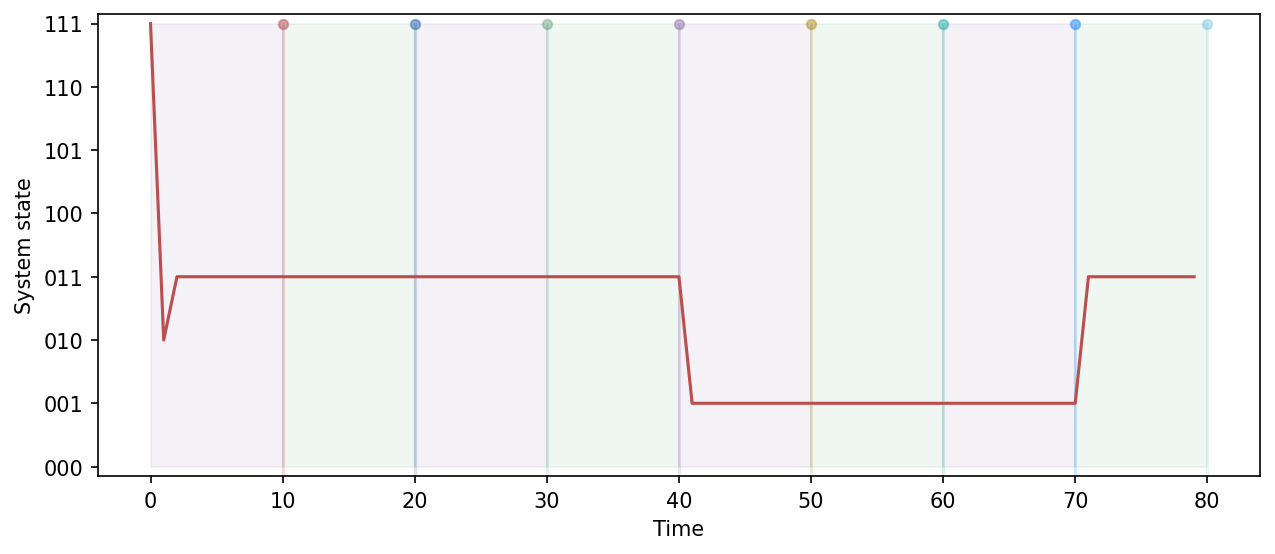

[14, 3, 35, 31, 28, 17, 13, 11]


In [49]:
seed = 42
np.random.seed(seed)
random.seed(seed)
n = 10
e_len = 6

en_ls0 = generate_random_sequence(2**e_len-1, 8)
en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]#[decimal_to_binary(11, min_length=e_len) for _ in range(n)], [decimal_to_binary(35, min_length=e_len) for _ in range(n)]]
un_sys, un_en, syn, expansive, introverted, long_serie= serie_plot2(tpm2, mech_size=3, en_size=e_len, en_series=en_series, init='111', leg=False, figure_show=True, color="#BB4F4F")
print(en_ls0)

In [50]:
expansive, introverted

(2.0547451650813215, -2.054745165081322)

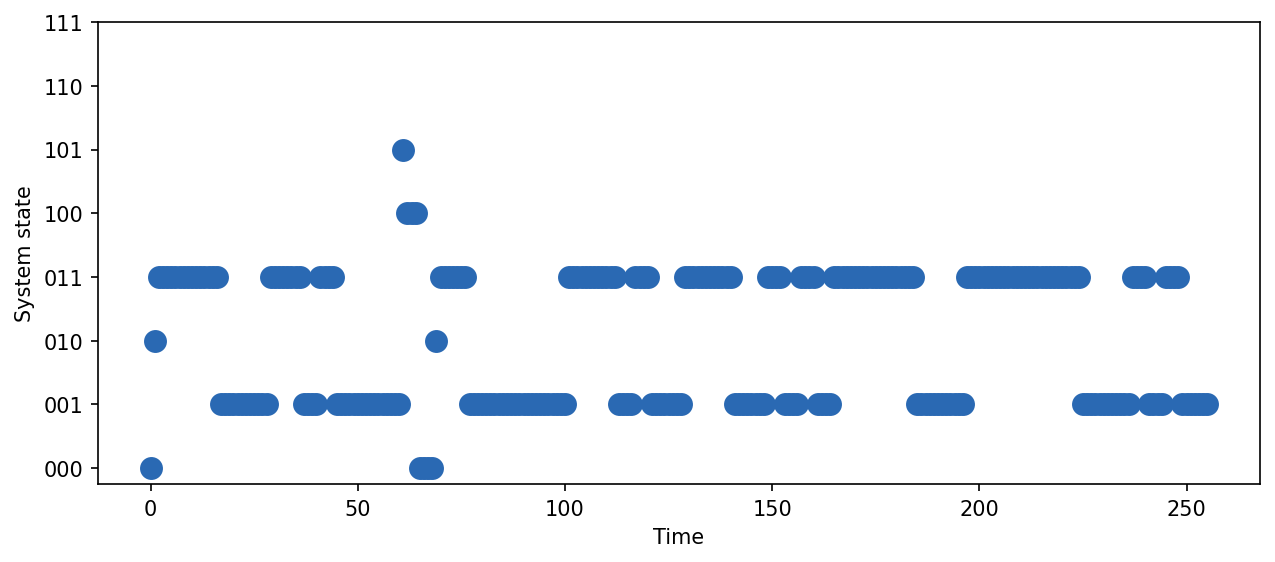

[14, 3, 35, 31, 28, 17, 13, 11, 54, 4, 27, 29, 25, 53, 57, 0, 20, 43, 19, 48, 12, 45, 44, 33, 5, 58, 15, 10, 37, 46, 24, 8, 47, 26, 34, 9, 21, 59, 41, 7, 40, 51, 63, 50, 18, 6, 49, 32, 1, 55, 22, 38, 62, 2, 39, 30, 16, 60, 56, 42, 52, 23, 61, 36]


In [73]:
import random
seed = 42
np.random.seed(seed)
random.seed(seed)
n = 4
e_len = 6

en_ls0 = generate_random_sequence(2**e_len-1, 64)
en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]#[decimal_to_binary(11, min_length=e_len) for _ in range(n)], [decimal_to_binary(35, min_length=e_len) for _ in range(n)]]
un_sys, un_en, syn, series_ls = serie_plot2(tpm2, mech_size=3, en_size=e_len, en_series=en_series, init='000', leg=False, figure_show=True, color="#BB4F4F")
print(en_ls0)

# Distance exp

In [1]:
import numpy as np
import networkx as nx

def decimal_to_binary(decimal, min_length=1):
    if min_length == 0:
        return ''
    if decimal == 0:
        return "0" if min_length == 1 else "0".zfill(min_length)
    binary = ""
    while decimal > 0:
        binary = str(decimal % 2) + binary
        decimal = decimal // 2
    # 使用 zfill 确保二进制字符串至少有 min_length 长度
    return binary.zfill(min_length)


def dis_mean(series):
    dis = 0
    lens = len(series)
    nums = lens * (lens - 1) / 2
    for i in series:
        for j in series:
            dis += hamming_distance(i,j)
    dis /= nums
    return dis

In [44]:
colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#9B76B2', "#B99523", "#27B5AF", "#1E90FF", "#87CEEB"]



def serie_plot2(tpm, mech_size, en_size, en_series, init='111', leg=False, figure_show=True, color="#BB4F4F"):
    colors = ['#2A69B3', '#74B38F', '#9B76B2', "#B99523", "#27B5AF", "#1E90FF", "#87CEEB"]
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm, mech_size=mech_size, en_size=en_size, dis=True)   
    strs = [decimal_to_binary(i, min_length=mech_size) for i in range(2**mech_size)] 
    long_serie = []
    init_state = init
    mark_serie = []
    mark = 0
    for en_list in en_series:
        en_state = en_list[0]
        steps = len(en_list)
        mark += steps
        mark_serie.append(mark)
        serie, serie_str = tpm_series2(tpm_dic[en_state], init_state, steps)
        init_state = serie_str[-1]
        long_serie += serie[:-1]
        
    if figure_show:
        fig, ax = plt.subplots(figsize=(10,4), dpi=150)
        for ind,mark in enumerate(mark_serie[:-1]):
            plt.scatter([mark], [7], marker='o', color=colors[ind], alpha=0.5, s=20)
            plt.plot([mark, mark], [7, -0.15], color=colors[ind], alpha=0.2)
            #ax.scatter(range(len(long_serie)), np.ones(len(long_serie))*indx, color='#2A69B3', alpha=1/8, s=100)
        ax.scatter(range(len(long_serie)), long_serie, label='init_state:'+init, color=color, s=80)
        
        ax.set_xlabel('Time')
        ax.set_ylabel('System state')
        
        # 设置y轴的标签
        ax.set_yticks(range(8))
        ax.set_yticklabels(strs)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        if leg:
            plt.legend(by_label.values(), by_label.keys(), loc=[1.01, 0])
        #plt.title(name + '_syn=' + str(round(syn,4)))
        plt.ylim([-0.15,7.15])
        plt.show()
        
    return un_sys, un_en, syn, long_serie
        



In [110]:
def serie_measure(tpm, mech_size, en_size, en_series):

    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm, mech_size=mech_size, en_size=en_size)   
    strs = [decimal_to_binary(i, min_length=mech_size) for i in range(2**mech_size)] 
    long_serie = []
    dis = 0
    for init_state in strs:
    
        for en_list in en_series:
            en_state = en_list[0]
            steps = len(en_list)
            serie, serie_str = tpm_series2(tpm_dic[en_state], init_state, steps)
            if len(long_serie)==0:
    #             dis_ser_ls = []
    #             for init1 in strs:
    #                 dis_ser, dis_ser_str = tpm_series2(tpm_dic[en_state], init1, steps)
    #                 dis_ser_ls.append(dis_ser)
                dis += 0 #dis_mean(dis_ser_ls)
            elif last_serie != serie:
            #else:
                dis_ser_ls = []
                for init1 in strs:
                    dis_ser, dis_ser_str = tpm_series2(tpm_dic[en_state], init1, 3)
                    dis_ser_ls.append(dis_ser)
                dis += dis_mean(dis_ser_ls)
            init_state = serie_str[-1]
            last_serie = serie
            long_serie += serie[:-1]
        
    return un_sys, un_en, syn, long_serie, dis / 8 / len(en_list)
        

# Syn

****************************************************************************************************
FBL
cellcollective/Arabidopsis thaliana Cell Cycle_26340681.txt
{(('CDKB1;1', 'E2Fa', 'RBR'), (7, 11, 8)): [0.4169682113433064, 1.6413450977900728, 0.586267007545693], 
(('CDKB1;1', 'E2Fa', 'E2Fb'), (7, 11, 5)): [0.5745729896334364, 1.388751403843787, 0.5424617759239556], 
(('MYB3R1/4', 'MYB77', 'RBR'), (4, 0, 8)): [1.3535513177764762, 0.9585086605007129, 0.5685092173190602], 
(('APC/C', 'CYCA2;3', 'E2Fa'), (13, 12, 11)): [0.8812695982692346, 1.4063856167755362, 0.6135612121508752]}

cellcollective/Trichostrongylus retortaeformis_22253585.txt
{(('EL2', 'IL4II', 'IgE'), (24, 19, 7)): [0.593182480003002, 1.646539393673697, 0.594317519996998]}

cellcollective/B bronchiseptica and T retortaeformis coinfection_22253585.txt
{(('EL2', 'IL4II', 'IgE'), (24, 23, 25)): [0.7088656166133305, 1.5842763737185241, 0.5801968833866695], 
(('AP', 'MPI_Bacterium', 'PIC'), (20, 0, 5)): [0.15124472273860234, 1.6623566498327425, 0.28625527726139766], 
(('AD', 'MPI_Bacterium', 'PIC'), (11, 0, 5)): [0.15991955683721687, 1.6824037190965067, 0.34652427854650664]}

cellcollective/CD4+ T cell Differentiation_22871178.txt
{(('Jak1', 'SOCS1', 'STAT1'), (28, 6, 0)): [1.1713511896136641, 0.8269902518432306, 0.5786488103863359], 
(('IL6', 'IL6R', 'RORgt'), (27, 14, 5)): [1.3132381505494193, 0.4559818503581615, 0.20238684945058072], 
(('IL21', 'IL21R', 'STAT3'), (20, 26, 11)): [1.4492035054291628, 0.6048425676587292, 0.30079649457083724], 
(('GATA3', 'STAT4', 'Tbet'), (13, 24, 10)): [0.8790231798104708, 0.934304230370005, 0.23973686127766958], 
(('Foxp3', 'NFAT', 'TGFbR'), (2, 8, 16)): [0.6358911673560985, 1.1146795417801865, 0.4578588326439015]}

cellcollective/Death Receptor Signaling_20221256.txt
{(('CASP3', 'NFkB', 'XIAP'), (24, 3, 2)): [0.9338343733773985, 0.9338343733773985, 0.5661656266226015]}

cellcollective/Colitis-associated colon cancer_26446703.txt
{(('CASP3', 'CASP8', 'P21'), (28, 63, 53)): [0.4057155803280919, 1.3192107062497076, 0.4692844196719081], 
(('SMAD', 'SMAD7', 'TGFR'), (4, 3, 49)): [0.9338343733773985, 0.9338343733773985, 0.5661656266226015], 
(('JAK', 'SOCS', 'STAT3'), (39, 52, 14)): [2.311278124459133, 0.3112781244591328, 0.18872187554086706], 
(('CASP3', 'CASP9', 'P21'), (28, 20, 53)): [0.44163839016864287, 1.2588736579197581, 0.43336160983135713]}

cellcollective/Signaling in Macrophage Activation_18433497.txt
{(('BAG4', 'BAG4_TNFRSF1A', 'TNF_BAG4_TNFRSF1A'), (57, 105, 8)): [0.9338343733773985, 0.9338343733773985, 0.5661656266226015]}

cellcollective/T cell differentiation_16542429.txt
{(('JAK1', 'SOCS1', 'STAT1'), (11, 1, 6)): [0.9338343733773985, 0.9338343733773985, 0.5661656266226015]}


****************************************************************************************************
fanin
cellcollective/Tumour Cell Invasion and Migration_26528548.txt
(('CDH1', 'CDH2', 'GF'), (26, 16, 25)): [0.9544340029249649, 1.1003111621563575, -8.881784197001252e-16], 
(('CTNNB1', 'VIM', 'ZEB2'), (29, 12, 13)): [0.8112781244591328, 0.7644035636998451, -9.29256671611256e-14], 

cellcollective/Apoptosis Network_19422837.txt

(('AKT', 'BAD', 'p53'), (33, 36, 3)): [0.8112781244591328, 1.9544340029249652, -2.220446049250313e-16], 
(('RIP', 'TNFR2', 'TRAF2'), (8, 31, 17)): [0.8112781244591328, 2.0, 0.0], 
(('AKT', 'JNKK', 'MEKK1'), (33, 35, 0)): [0.8112781244591328, 2.0, 0.0], 

cellcollective/Aurora Kinase A in Neuroblastoma_26616283.txt
(('ENSA', 'PP1', 'PP2A'), (8, 3, 13)): [0.8112781244591328, 1.5435644431995965, -2.220446049250313e-16], 

cellcollective/Body Segmentation in Drosophila 2013_23520449.txt
(('CIR', 'EN_protein', 'hh'), (3, 1, 10)): [0.8112781244591328, 1.5435644431995965, -2.220446049250313e-16], 

cellcollective/B bronchiseptica and T retortaeformis coinfection_22253585.txt
(('DP', 'NE_Bacterium', 'TTSSI'), (19, 16, 21)): [0.8112781244591328, 1.5435644431995965, -2.220446049250313e-16], 
(('IL10I', 'IL10I_Bacterium', 'Th2I_TRetortaeformis'), (13, 31, 7)): [0.8112781244591328, 1.6962122601251457, -2.220446049250313e-16], 
(('DCII_Bacterium', 'DCII_TRetortaeformis', 'T0'), (8, 46, 32)): [0.8112781244591328, 2.0, 0.0], 
(('NE_Bacterium', 'NE_TRetortaeformis', 'TNE'), (16, 48, 27)): [0.8112781244591328, 1.7661319257440469, -2.220446049250313e-16], 

cellcollective/Bordetella bronchiseptica_22253585.txt
(('DP', 'NE', 'TTSSI'), (30, 13, 20)): [0.8112781244591328, 1.5435644431995965, -2.220446049250313e-16], 

****************************************************************************************************
mutualin
cellcollective/Apoptosis Network_19422837.txt
(('IKK', 'IkB', 'NFkB'), (38, 18, 1)): [1.811278124459133, 0.9544340029249649, -2.220446049250313e-16], 



In [117]:
name_h_ls = ['Arabidopsis thaliana Cell Cycle_26340681.txt','B bronchiseptica and T retortaeformis coinfection_22253585.txt',
             'CD4+ T cell Differentiation_22871178.txt','Arabidopsis thaliana Cell Cycle_26340681.txt',
             'Trichostrongylus retortaeformis_22253585.txt']
ind_h_ls = [[7, 11, 8],[24, 23, 25],[28, 6, 0],[13, 12, 11],[24, 19, 7]]
name_l_ls = ['Apoptosis Network_19422837.txt','Bordetella bronchiseptica_22253585.txt',
             'B bronchiseptica and T retortaeformis coinfection_22253585.txt','B bronchiseptica and T retortaeformis coinfection_22253585.txt',
             'B bronchiseptica and T retortaeformis coinfection_22253585.txt']
ind_l_ls = [[38, 18, 1],[30, 13, 20],[19, 16, 21],[13, 31, 7],[8, 46, 32]]

name_h_ls = ['Arabidopsis thaliana Cell Cycle_26340681.txt',
             'Arabidopsis thaliana Cell Cycle_26340681.txt',
             'Trichostrongylus retortaeformis_22253585.txt']
ind_h_ls = [[7, 11, 8],[13, 12, 11],[24, 19, 7]]
name_l_ls = ['B bronchiseptica and T retortaeformis coinfection_22253585.txt',
             'B bronchiseptica and T retortaeformis coinfection_22253585.txt',
             'B bronchiseptica and T retortaeformis coinfection_22253585.txt']
ind_l_ls = [[19, 16, 21],[13, 31, 7],[8, 46, 32]]

3it [00:01,  1.92it/s]
3it [00:08,  2.96s/it]


Text(0, 0.5, 'Mean Distance')

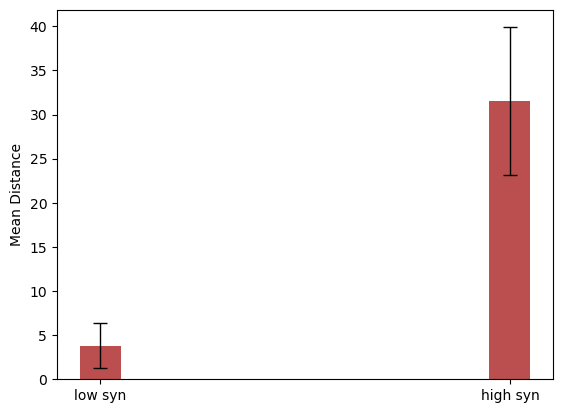

In [118]:
import random
from tqdm import tqdm
seeds = range(3)
n = 12
dis_ls1 = []
for i,name in tqdm(enumerate(name_l_ls)):  
    un, un_en, syn, tpm2, e_len = text_bn_graph(folder = 'cellcollective/', textfile = name, candidate_sys=ind_l_ls[i], noise=0, save_onenote = False)
    e_len -= 3
    en_lss = generate_random_sequence(2**e_len-1, 2**e_len, seeds)
    diss = []
    for en_ls0 in en_lss:
        en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]
        un_sys, un_en, syn, long_serie, dis = serie_measure(tpm2, mech_size=3, en_size=e_len, en_series=en_series)
        diss.append(dis)
    dis_ls1 += diss
    
dis_ls2 = []
for i,name in tqdm(enumerate(name_h_ls)):  
    un, un_en, syn, tpm2, e_len = text_bn_graph(folder = 'cellcollective/', textfile = name, candidate_sys=ind_h_ls[i], noise=0, save_onenote = False)
    e_len -= 3
    en_lss = generate_random_sequence(2**e_len-1, 2**e_len, seeds)
    diss = []
    for en_ls0 in en_lss:
        en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]
        un_sys, un_en, syn, long_serie, dis = serie_measure(tpm2, mech_size=3, en_size=e_len, en_series=en_series)
        diss.append(dis)
    dis_ls2 += diss
    
means = [np.mean(dis_ls1), np.mean(dis_ls2)]
stds = [np.std(dis_ls1), np.std(dis_ls2)]
plt.bar(['low syn','high syn'], means, width=0.1, color=colors[0])
plt.errorbar(['low syn','high syn'], means, yerr=stds, fmt='none', capsize=5, ecolor='black', elinewidth=1)
plt.ylabel('Mean Distance')

In [119]:
np.save("syn_max.npy", dis_ls2)
np.save("syn_min.npy", dis_ls1)

# un_sys

un
MAX
mutualin——cellcollective/Neurotransmitter Signaling Pathway_17010384.txt
{(('COMT', 'Dopamine', 'Tryosine_hydroxylase'), (14, 6, 5)): [2.5, 0.0, 0.0]}

FBL——cellcollective/Colitis-associated colon cancer_26446703.txt
 (('JAK', 'SOCS', 'STAT3'), (39, 52, 14)): [2.311278124459133, 0.3112781244591328, 0.18872187554086706], 

semiclique——cellcollective/Mammalian Cell Cycle 2006_16873462.txt
{(('Cdc20', 'Cdh1', 'CycB'), (0, 9, 7)): [2.2094106155360373, 0.1705008499786458, 0.03231868113613734],

FL——cellcollective/Iron acquisition and oxidative stress response in aspergillus fumigatus_25908096.txt
(('ROS', 'SOD2/3', 'Yap1'), (2, 17, 13)): [2.034499051974371, 0.5034692520226928, 0.059250948025629135], 
(('ROS', 'ThP', 'Yap1'), (2, 0, 13)): [2.034499051974371, 0.5034692520226927, 0.059250948025629135], 
****************************************************************************************************
MIN
fanin——cellcollective/Signaling in Macrophage Activation_18433497.txt
(('ATF2', 'CBP', 'IFNB1gene'), (257, 50, 298)), Value: [0.0, 2.011900448771847, 0.0]
(('CBP', 'IFNB1gene', 'RELAp65_NFBK1p50nucleus'), (50, 298, 34)), Value: [0.0, 2.011900448771847, 0.0]
(('ATF2', 'IFNB1gene', 'RELAp65_NFBK1p50nucleus'), (257, 298, 34)), Value: [0.0, 2.2006223243127137, 0.0]
(('IFNB1gene', 'IRF3_IRF7nucleus', 'RELAp65_NFBK1p50nucleus'), (298, 72, 34)), Value: [0.0, 2.2006223243127137, 0.0]
(('ATF2', 'IFNB1gene', 'IRF3_IRF7nucleus'), (257, 298, 72)), Value: [0.0, 2.200622324312714, 0.0]
(('CBP', 'IFNB1gene', 'IRF3_IRF7nucleus'), (50, 298, 72)), Value: [0.0, 2.0119004487718475, 0.0]

fanin——cellcollective/CD4+ T cell Differentiation_22871178.txt
 (('IFNg', 'NFAT', 'STAT4'), (19, 8, 24)), Value: [0.0, 2.3092765705836946, 0.0]

fanin——cellcollective/Septation Initiation Network_26244885.txt
(('SIP', 'cdc11', 'sid2'), (6, 9, 3)), Value: [0.0, 2.360073065154532, 0.0]



In [120]:
name_h_ls = ['Neurotransmitter Signaling Pathway_17010384.txt','Colitis-associated colon cancer_26446703.txt',
             'Mammalian Cell Cycle 2006_16873462.txt','Iron acquisition and oxidative stress response in aspergillus fumigatus_25908096.txt',
             'Iron acquisition and oxidative stress response in aspergillus fumigatus_25908096.txt']
ind_h_ls = [[14, 6, 5],[39, 52, 14],[0, 9, 7],[2, 17, 13],[2, 0, 13]]
name_l_ls = ['Signaling in Macrophage Activation_18433497.txt','Signaling in Macrophage Activation_18433497.txt',
             'Signaling in Macrophage Activation_18433497.txt','Signaling in Macrophage Activation_18433497.txt',
             'Signaling in Macrophage Activation_18433497.txt']
ind_l_ls = [[257, 50, 298],[50, 298, 34],[257, 298, 34],[298, 72, 34],[50, 298, 72]]

name_h_ls = name_h_ls[:3]
ind_h_ls = ind_h_ls[:3]
name_l_ls = name_l_ls[:3]
ind_l_ls = ind_l_ls[:3]

3it [01:12, 24.30s/it]
3it [00:00, 14.65it/s]


Text(0, 0.5, 'Mean Distance')

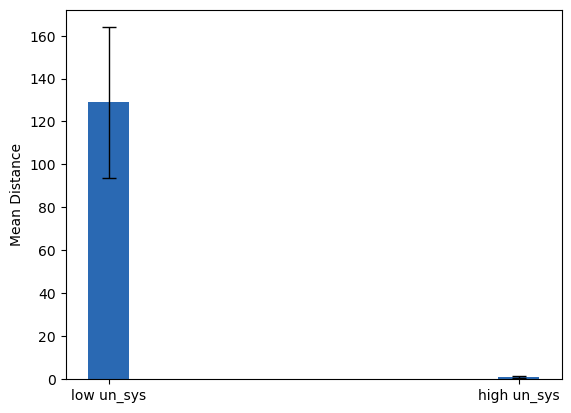

In [121]:
seeds = range(3)
n = 12
dis_ls1 = []
for i,name in tqdm(enumerate(name_l_ls)):  
    un, un_en, syn, tpm2, e_len = text_bn_graph(folder = 'cellcollective/', textfile = name, candidate_sys=ind_l_ls[i], noise=0, save_onenote = False)
    e_len -= 3
    en_lss = generate_random_sequence(2**e_len-1, 2**e_len, seeds)
    diss = []
    for en_ls0 in en_lss:
        en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]
        un_sys, un_en, syn, long_serie, dis = serie_measure(tpm2, mech_size=3, en_size=e_len, en_series=en_series)
        diss.append(dis)
    dis_ls1 += diss
    
dis_ls2 = []
for i,name in tqdm(enumerate(name_h_ls)):  
    un, un_en, syn, tpm2, e_len = text_bn_graph(folder = 'cellcollective/', textfile = name, candidate_sys=ind_h_ls[i], noise=0, save_onenote = False)
    e_len -= 3
    en_lss = generate_random_sequence(2**e_len-1, 2**e_len, seeds)
    diss = []
    for en_ls0 in en_lss:
        en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]
        un_sys, un_en, syn, long_serie, dis = serie_measure(tpm2, mech_size=3, en_size=e_len, en_series=en_series)
        diss.append(dis)
    dis_ls2 += diss
    
means = [np.mean(dis_ls1), np.mean(dis_ls2)]
stds = [np.std(dis_ls1), np.std(dis_ls2)]
plt.bar(['low un_sys','high un_sys'], means, width=0.1, color=colors[1])
plt.errorbar(['low un_sys','high un_sys'], means, yerr=stds, fmt='none', capsize=5, ecolor='black', elinewidth=1)
plt.ylabel('Mean Distance')

In [122]:
np.save("un_sys_max.npy", dis_ls2)
np.save("un_sys_min.npy", dis_ls1)

# un_en

unen
MAX
fanin——cellcollective/B bronchiseptica and T retortaeformis coinfection_22253585.txt
(('DCII_Bacterium', 'DCII_TRetortaeformis', 'IL4II'), (8, 46, 23)), Value: [0.0001379275276325953, 2.9549853317450205, 0.012538293167041355]

fanin——cellcollective/Pro-inflammatory Tumor Microenvironment in Acute Lymphoblastic Leukemia_27594840.txt
(('GCSF', 'PI3KAkt_H', 'TLR_H'), (20, 0, 22)), Value: [0.004792076087933646, 2.9223571027694026, 0.07126524808011003]

fanin——cellcollective/T cell differentiation_16542429.txt
(('IFNg', 'IRAK', 'NFAT'), (2, 4, 7)), Value: [0.008571898163022892, 2.8957706333368725, 0.09283786739436871]

fanin——cellcollective/Lymphopoiesis Regulatory Network_26408858.txt
(('EOMES', 'IFNg', 'IRAK'), (6, 17, 30)), Value: [0.009181036907344255, 2.8500161038633838, 0.09222872865004733]

fanin——cellcollective/Differentiation of T lymphocytes_23743337.txt
 (('Eomes', 'IFNg', 'IRAK'), (11, 18, 33)): [0.009181036907344255, 2.8500161038633838, 0.09222872865004733], 
****************************************************************************************************
MIN
fanout——cellcollective/Pro-inflammatory Tumor Microenvironment in Acute Lymphoblastic Leukemia_27594840.txt
(('TLR_H', 'TLR_M', 'lTLR'), (22, 2, 8)), Value: [1.0, 0.0, 0.0]

fanout——cellcollective/T Cell Receptor Signaling_17722974.txt
(('cblb', 'cd28', 'xx'), (38, 78, 88)), Value: [1.0, 0.0, 0.0]

mutualin——cellcollective/Neurotransmitter Signaling Pathway_17010384.txt
{(('COMT', 'Dopamine', 'Tryosine_hydroxylase'), (14, 6, 5)): [2.5, 0.0, 0.0]}

cascade——cellcollective/Cardiac development_23056457.txt
(('canWnt', 'exogen_CanWnt_I', 'exogen_canWnt_II'), (4, 13, 3)), Value: [2.0, 0.0, 0.0]

cascade——cellcollective/Predicting Variabilities in Cardiac Gene_26207376.txt
(('canWnt', 'exogen_CanWnt_I', 'exogen_CanWnt_II'), (9, 10, 3)), Value: [2.0, 0.0, 0.0]

In [123]:
name_h_ls = ['Pro-inflammatory Tumor Microenvironment in Acute Lymphoblastic Leukemia_27594840.txt','B bronchiseptica and T retortaeformis coinfection_22253585.txt',
             'T cell differentiation_16542429.txt','Lymphopoiesis Regulatory Network_26408858.txt',
             'Differentiation of T lymphocytes_23743337.txt']
ind_h_ls = [[20, 0, 22],[8, 46, 23],[2, 4, 7],[6, 17, 30],[11, 18, 33]]
name_l_ls = ['Pro-inflammatory Tumor Microenvironment in Acute Lymphoblastic Leukemia_27594840.txt','T Cell Receptor Signaling_17722974.txt',
             'Neurotransmitter Signaling Pathway_17010384.txt','Cardiac development_23056457.txt',
             'Predicting Variabilities in Cardiac Gene_26207376.txt']
ind_l_ls = [[22, 2, 8],[38, 78, 88],[14, 6, 5],[4, 13, 3],[9, 10, 3]]

name_h_ls = name_h_ls[:3]
ind_h_ls = ind_h_ls[:3]
name_l_ls = name_l_ls[:3]
ind_l_ls = ind_l_ls[:3]

3it [00:00, 17.16it/s]
3it [00:12,  4.08s/it]


Text(0, 0.5, 'Mean Distance')

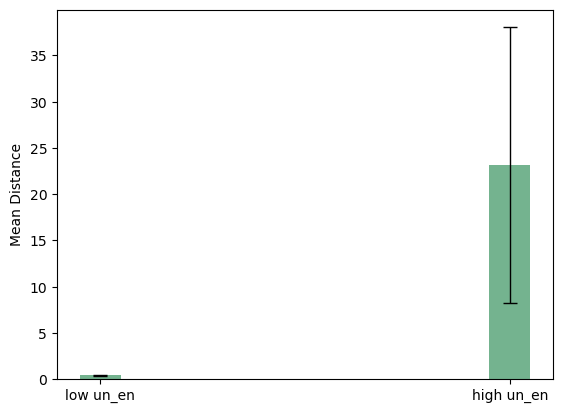

In [124]:
seeds = range(3)
n = 12
dis_ls1 = []
for i,name in tqdm(enumerate(name_l_ls)):  
    un, un_en, syn, tpm2, e_len = text_bn_graph(folder = 'cellcollective/', textfile = name, candidate_sys=ind_l_ls[i], noise=0, save_onenote = False)
    e_len -= 3
    en_lss = generate_random_sequence(2**e_len-1, 2**e_len, seeds)
    diss = []
    for en_ls0 in en_lss:
        en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]
        un_sys, un_en, syn, long_serie, dis = serie_measure(tpm2, mech_size=3, en_size=e_len, en_series=en_series)
        diss.append(dis)
    dis_ls1 += diss
    
dis_ls2 = []
for i,name in tqdm(enumerate(name_h_ls)):  
    un, un_en, syn, tpm2, e_len = text_bn_graph(folder = 'cellcollective/', textfile = name, candidate_sys=ind_h_ls[i], noise=0, save_onenote = False)
    e_len -= 3
    en_lss = generate_random_sequence(2**e_len-1, 2**e_len, seeds)
    diss = []
    for en_ls0 in en_lss:
        en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]
        un_sys, un_en, syn, long_serie, dis = serie_measure(tpm2, mech_size=3, en_size=e_len, en_series=en_series)
        diss.append(dis)
    dis_ls2 += diss
    
means = [np.mean(dis_ls1), np.mean(dis_ls2)]
stds = [np.std(dis_ls1), np.std(dis_ls2)]
plt.bar(['low un_en','high un_en'], means, width=0.1, color=colors[2])
plt.errorbar(['low un_en','high un_en'], means, yerr=stds, fmt='none', capsize=5, ecolor='black', elinewidth=1)
plt.ylabel('Mean Distance')

In [125]:
np.save("un_en_max.npy", dis_ls2)
np.save("un_en_min.npy", dis_ls1)

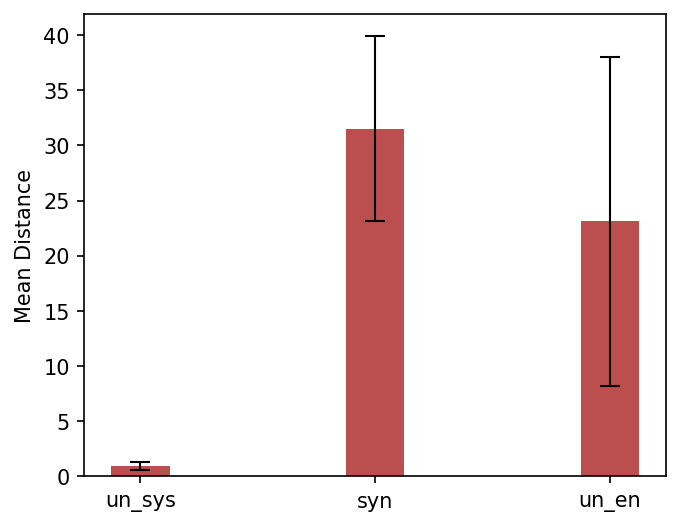

In [128]:
dis_en_max = np.load("un_en_max.npy")
dis_en_min = np.load("un_en_min.npy")
dis_sys_max = np.load("un_sys_max.npy")
dis_sys_min = np.load("un_sys_min.npy")
dis_syn_max = np.load("syn_max.npy")
dis_syn_min = np.load("syn_min.npy")

plt.figure(figsize=(5,4), dpi=150)
means = [np.mean(dis_sys_max), np.mean(dis_syn_max), np.mean(dis_en_max)]
stds = [np.std(dis_sys_max), np.std(dis_syn_max), np.std(dis_en_max)]
x_pos = np.arange(len(means))
#plt.bar(x_pos[:3], means[:3], color=colors[1], width=0.25, label='Min')
plt.bar(x_pos, means, color=colors[0], width=0.25)
plt.errorbar(x_pos, means, yerr=stds, fmt='none', capsize=5, ecolor='black', elinewidth=1)
plt.xticks(x_pos, ['un_sys','syn', "un_en"])
plt.ylabel('Mean Distance')
plt.show()

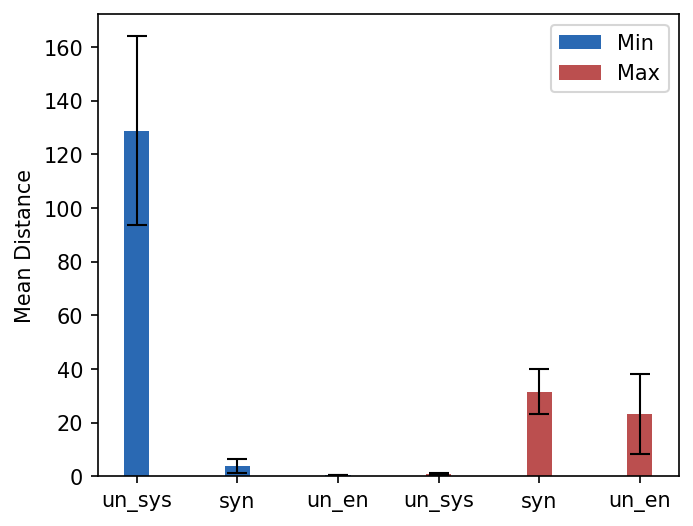

In [126]:
dis_en_max = np.load("un_en_max.npy")
dis_en_min = np.load("un_en_min.npy")
dis_sys_max = np.load("un_sys_max.npy")
dis_sys_min = np.load("un_sys_min.npy")
dis_syn_max = np.load("syn_max.npy")
dis_syn_min = np.load("syn_min.npy")

plt.figure(figsize=(5,4), dpi=150)
means = [np.mean(dis_sys_min), np.mean(dis_syn_min), np.mean(dis_en_min), np.mean(dis_sys_max), np.mean(dis_syn_max), np.mean(dis_en_max)]
stds = [np.std(dis_sys_min), np.std(dis_syn_min), np.std(dis_en_min), np.std(dis_sys_max), np.std(dis_syn_max), np.std(dis_en_max)]
x_pos = np.arange(len(means))
plt.bar(x_pos[:3], means[:3], color=colors[1], width=0.25, label='Min')
plt.bar(x_pos[3:], means[3:], color=colors[0], width=0.25, label='Max')
plt.errorbar(x_pos, means, yerr=stds, fmt='none', capsize=5, ecolor='black', elinewidth=1)
plt.xticks(x_pos, ['un_sys','syn', "un_en",'un_sys','syn', "un_en"])
plt.ylabel('Mean Distance')
plt.legend()
plt.show()



# New measure

In [89]:
import numpy as np
from func.EI_calculation import tpm_ei

def decimal_to_binary(decimal, min_length=1):
    if min_length == 0:
        return ''
    if decimal == 0:
        return "0" if min_length == 1 else "0".zfill(min_length)
    binary = ""
    while decimal > 0:
        binary = str(decimal % 2) + binary
        decimal = decimal // 2
    # 使用 zfill 确保二进制字符串至少有 min_length 长度
    return binary.zfill(min_length)

def tpm_series2(tpm, init_p, steps):
    prob = init_p
    serie = []
    for t in range(steps):
        prob = prob @ tpm
        serie.append(np.argmax(prob))
    return prob, serie

def tpm_series(tpm, init_p, steps):
    prob = init_p
    serie = []
    for t in range(steps):
        prob = prob @ tpm
        serie.append(np.argmax(prob))
    return prob, serie

def kl_divergence(p, q):
    p = np.array(p)
    q = np.array(q)
    eps = 1E-10
    p_e = np.where(p==0, eps, p)
    q_e = np.where(q==0, eps, q)
    return np.sum(p * np.log2(p_e / q_e))

def hamming_distance(seq1, seq2):
    # 确保两个序列长度相同
    if len(seq1) != len(seq2):
        raise ValueError("Both sequences must have the same length")
    
    # 计算汉明距离
    distance = 0
    for bit1, bit2 in zip(seq1, seq2):
        # 如果两个位不同，则距离加1
        if bit1 != bit2:
            distance += 1
    
    return distance

def dis_list(probs, hamming=True):
    dis = 0
    lens = len(probs)
    nums = lens ** 2
    for i in probs:
        for j in probs:
            if hamming:
                dis += hamming_distance(i,j)
            else:
                dis += kl_divergence(i,j)
    dis /= nums
    return dis

def dis_arr(arr, hamming=True):
    dis = 0
    lens = arr.shape[0]
    nums = lens ** 2
    for i in range(lens):
        for j in range(lens):
            if hamming:
                dis += hamming_distance(arr[i,:],arr[j,:])
            else:
                dis += kl_divergence(i,j)
    dis /= nums
    return dis


def generate_random_sequence(n, length):
    res_ls = []
    result = []
    while len(result) < length:
        num = random.randint(0, n)
        if num not in result:
            result.append(num)
    return result

# def dis_measure_en(tpm, mech_size, en_size, steps=5, random_n=8, seed=42):
#     un_sys, un_en, syn, expansive, introverted, tpm_dic = iit_tpm_cal(tpm, mech_size=mech_size, en_size=en_size)   
#     init_p = np.ones([1,8]) / 8
#     en_ls = generate_random_sequence(2**en_size-1, random_n, seed)
#     en_series =  [decimal_to_binary(i, min_length=en_size) for i in en_ls] 
#     probs = []
#     dis = 0
#     for en_state in en_series:
#         prob, serie = tpm_series2(tpm_dic[en_state], init_p, steps)
#         probs.append(prob)
#     dis = dis_KL(probs)
        
#     return un_sys, un_en, syn, expansive, introverted, dis / random_n


def dis_measure_all(tpm, mech_size, en_size, steps=5, random_n=8, seed=42):
    un_sys, un_en, syn, expansive, introverted, tpm_dic = iit_tpm_cal(tpm, mech_size=mech_size, en_size=en_size)   
    np.random.seed(seed)
    random.seed(seed)
    probs = []
    dis = 0
    init_ps = np.eye(8)
    series = []
    en_ls = generate_random_sequence(2**en_size-1, random_n)
    en_series =  [decimal_to_binary(i, min_length=en_size) for i in en_ls] 
    dict_init = {key: np.zeros((random_n, steps)) for key in range(8)}
    dict_en = {key: np.zeros((8, steps)) for key in en_series}
    for j in range(8):
        init_p = init_ps[j,:]#np.random.rand(8)
#         init_p /= np.sum(init_p)
        
        for k, en_state in enumerate(en_series):
            #prob, serie = tpm_series2(tpm_dic[en_state], init_p, steps)
            dict_init[j][k,:] = serie 
            dict_en[en_state][j,:] = serie
            #probs.append(prob)
            #series.append(serie)
    for i in range(8):
        dis += dis_arr(dict_init[i])
        dis += dis_arr(dict_en[en_series[i]])
        
    return un_sys, un_en, syn, expansive, introverted, dis / steps
        
    
def serie_measure(tpm, mech_size, en_size, steps=12, random_n=8, seed=42):
    un_sys, un_en, syn, expansive, introverted, tpm_dic = iit_tpm_cal(tpm, mech_size=mech_size, en_size=en_size)   
    strs = [decimal_to_binary(i, min_length=mech_size) for i in range(2**mech_size)] 
    np.random.seed(seed)
    random.seed(seed)
    long_serie = []
    mis = 0
    init_ps = np.eye(8)
    en_ls = generate_random_sequence(2**en_size-1, 2**en_size)
    en_series =  [decimal_to_binary(i, min_length=en_size) for i in en_ls] 
    for j in range(8):
        for en_state in en_series:
            prob, serie = tpm_series2(tpm_dic[en_state], init_ps[j,:], steps)
            if len(long_serie)==0:
                mis += 0 
            elif last_serie[-1] != serie[-1]:
                mis += tpm_ei(tpm_dic[en_state])
            last_serie = serie
            long_serie += serie[:-1]
        
    return un_sys, un_en, syn, expansive, introverted, mis / 8 / 2**en_size

100%|██████████| 13/13 [33:32<00:00, 154.77s/it][A


拟合系数：斜率（m）=0.2376261394479076, 截距（b）=0.24708154509747132
可决系数（R-squared）：0.0265709802891122
皮尔逊相关系数：0.1630060743932946
p值：1.7670116832768751e-12


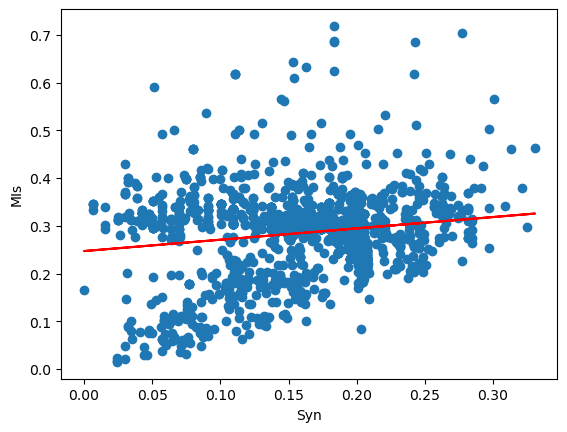

100%|██████████| 13/13 [00:04<00:00,  2.67it/s]


拟合系数：斜率（m）=0.41374485026611835, 截距（b）=0.6114967765226419
可决系数（R-squared）：0.04426478376580534
皮尔逊相关系数：0.2103919764767782
p值：0.028101014939741324


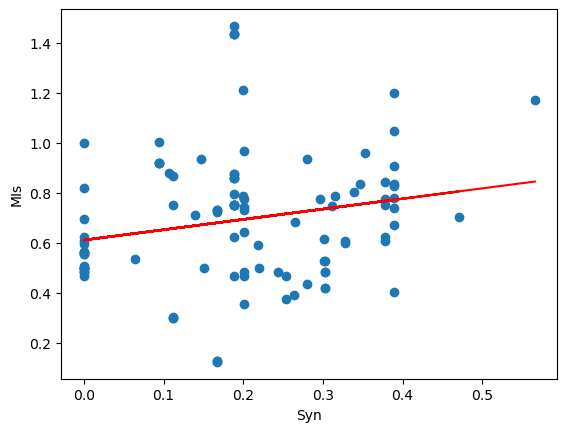

100%|██████████| 13/13 [00:05<00:00,  2.40it/s][A

拟合系数：斜率（m）=0.23626033486244602, 截距（b）=0.20061314856058643
可决系数（R-squared）：0.014938178706458194
皮尔逊相关系数：0.12222184218239525
p值：0.41841390861312544


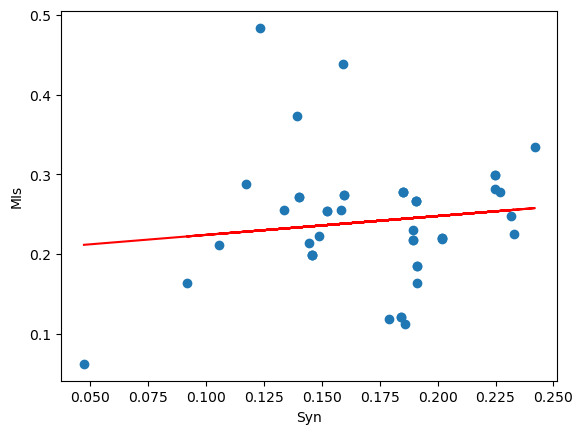

100%|██████████| 13/13 [00:25<00:00,  1.99s/it]

拟合系数：斜率（m）=0.49293623759870236, 截距（b）=0.4061230926202997
可决系数（R-squared）：0.034764518997301486
皮尔逊相关系数：0.1864524577400406
p值：0.05448957315126061


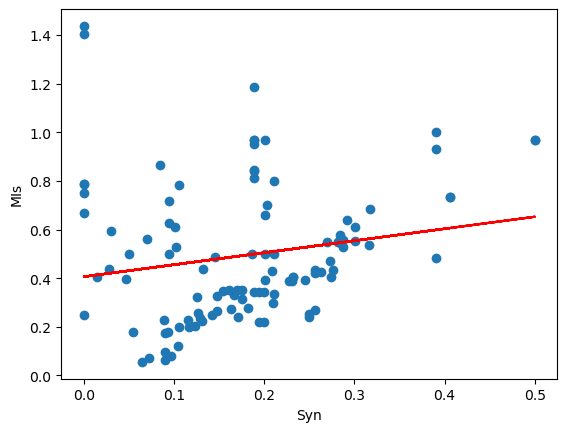

100%|██████████| 13/13 [00:01<00:00, 12.16it/s]


拟合系数：斜率（m）=0.3223092681018111, 截距（b）=0.2515415431976745
可决系数（R-squared）：0.15497961428474694
皮尔逊相关系数：0.3936745029650093
p值：0.07745012247673917


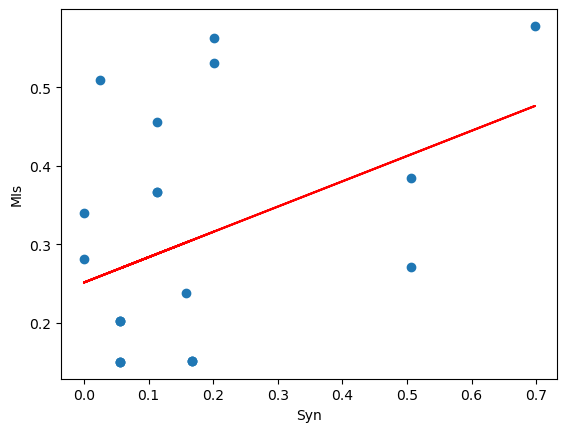

 15%|█▌        | 2/13 [32:42<2:56:13, 961.24s/it] 

In [ ]:
from func.motify_functions import *
import random
from tqdm import tqdm
def measure_plot(all_syn, all_measure):
    # 使用 numpy 的 polyfit 函数进行线性拟合
    coefficients = np.polyfit(all_syn, all_measure, 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    p = np.poly1d(coefficients)
    all_dis_fit = p(all_syn)
    ss_res = np.sum((all_measure - all_dis_fit) ** 2)
    ss_tot = np.sum((all_measure - np.mean(all_measure)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    print(f"拟合系数：斜率（m）={slope}, 截距（b）={intercept}")
    correlation_coefficient, p_value = pearsonr(all_syn, all_measure)
    print(f"可决系数（R-squared）：{r_squared}")
    print(f"皮尔逊相关系数：{correlation_coefficient}")
    print(f"p值：{p_value}")
    plt.scatter(all_syn, all_measure)
    plt.plot(all_syn, all_dis_fit, color='red')
    plt.xlabel("Syn")
    plt.ylabel("MIs")
    plt.show()
    return correlation_coefficient
    
def cal_motify(function, file_path):
    syn_ls=[]
    expan_ls=[]
    intro_ls=[]
    un_sys_ls=[]
    un_en_ls=[]
    mis_ls=[]
    # 文件-图
    graph = create_digraph_from_bn(file_path)
    # 找出三元完全子图
    subgraphs, name_subgraphs = function(file_path, graph, 3)
    # 将名称改为序号
    name_to_index = name_to_order(file_path)
    # 排除包含环境的三元组
    filtered_subgraphs = filter_subgraphs(subgraphs, name_to_index)
    # 将找到的三元组名称换成序号
    replaced_subgraphs = [(name_to_index[n1], name_to_index[n2], name_to_index[n3]) for n1, n2, n3 in filtered_subgraphs]
    for replaced_subgraph in replaced_subgraphs:
        _, _, syn, tpm, e_len=\
        text_bn_graph(textfile=str(file_path), candidate_sys=list(replaced_subgraph), noise=0)
        e_len -= 3
        un_sys, un_en, syn, expansive, introverted, mis = serie_measure(tpm, mech_size=3, en_size=e_len)
        un_sys_ls.append(un_sys)
        un_en_ls.append(un_en)
        syn_ls.append(syn)
        mis_ls.append(mis)
        expan_ls.append(expansive)
        intro_ls.append(introverted)
    return un_sys_ls, un_en_ls, syn_ls, expan_ls, intro_ls, mis_ls

file_dict = {}
directory = Path('cellcollective')
counter = 0
for file_path in directory.rglob('*'):
    if file_path.is_file():
        file_dict[counter] = str(file_path)
        counter += 1

functionsname = [fanout, fanin, cascade, mutualout, mutualin, bimutual, 
                 FFL, FBL, regulatingmutual, regulatedmutual, mutualcascade, semiclique, clique]


key_list = list(file_dict.keys())
pear_co = []
for key in tqdm(key_list[4:]):
    all_un = []
    all_un_en = []
    all_syn = []
    all_mis = []
    all_expan = []
    all_intro = []
    for function in tqdm(functionsname):
        un_sys_ls, un_en_ls, syn_ls, expan_ls, intro_ls, mis_ls = cal_motify(function, file_dict[key])
        all_un += un_sys_ls
        all_un_en += un_en_ls
        all_syn += syn_ls
        all_mis += mis_ls
        all_expan += expan_ls
        all_intro += intro_ls
    pear_co.append(measure_plot(all_syn, all_mis))

In [92]:
np.save("all_un_sys.npy", all_un)
np.save("all_un_en.npy", all_un_en)
np.save("all_syn.npy", all_syn)
np.save("all_dis.npy", all_dis)
np.save("all_expan.npy", all_expan)
np.save("all_intro.npy", all_intro)

In [85]:
all_un_sys = np.load("all_un_sys.npy")
all_un_en = np.load("all_un_en.npy")
all_syn = np.load("all_syn.npy")
all_dis = np.load("all_dis.npy")
all_expan = np.load("all_expan.npy")
all_intro = np.load("all_intro.npy")

Text(0, 0.5, 'Distance')

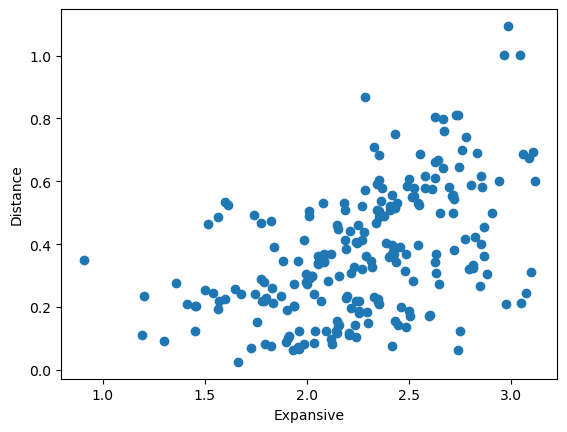

In [97]:
plt.scatter(all_expan, all_dis)
plt.xlabel("Expansive")
plt.ylabel("Distance")

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# 假设 all_syn 和 all_dis 是你的数据点
# all_syn = np.array([...])
# all_dis = np.array([...])



Text(0, 0.5, 'Distance')

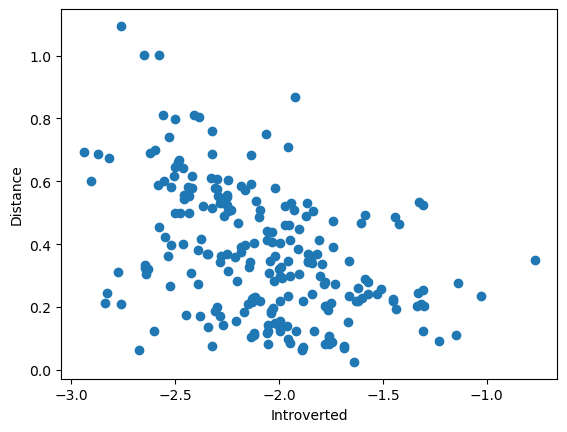

In [98]:
plt.scatter(all_intro, all_dis)
plt.xlabel("Introverted")
plt.ylabel("Distance")

拟合系数：斜率（m）=-0.11365854571042468, 截距（b）=0.5356340650346779
可决系数（R-squared）：0.06192726726757092
皮尔逊相关系数：-0.24885189825993098
p值：0.00017368650025353994


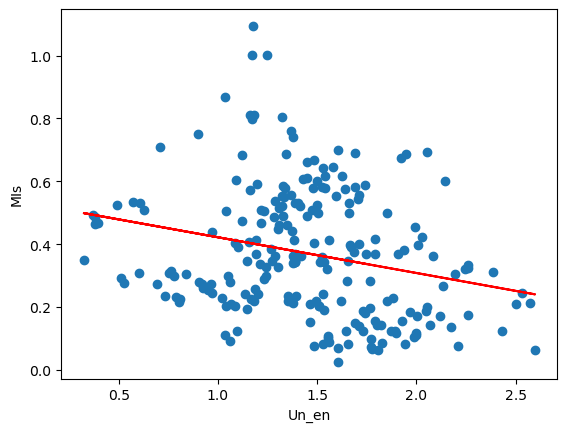

In [95]:
coefficients = np.polyfit(all_un_en, all_dis, 1)

# 拟合系数
slope = coefficients[0]
intercept = coefficients[1]

# 使用 poly1d 创建拟合函数
p = np.poly1d(coefficients)

# 计算拟合线的 y 值
all_dis_fit = p(all_un_en)

# 计算残差平方和（SS_res）
ss_res = np.sum((all_dis - all_dis_fit) ** 2)

# 计算总平方和（SS_tot）
ss_tot = np.sum((all_dis - np.mean(all_dis)) ** 2)

# 计算可决系数（R-squared）
r_squared = 1 - (ss_res / ss_tot)

# 打印拟合系数和可决系数
print(f"拟合系数：斜率（m）={slope}, 截距（b）={intercept}")
correlation_coefficient, p_value = pearsonr(all_un_en, all_dis)

print(f"可决系数（R-squared）：{r_squared}")
print(f"皮尔逊相关系数：{correlation_coefficient}")
print(f"p值：{p_value}")

# 绘制散点图
plt.scatter(all_un_en, all_dis)

# 绘制拟合线
plt.plot(all_un_en, all_dis_fit, color='red')

# 设置 x 轴和 y 轴标签
plt.xlabel("Un_en")
plt.ylabel("MIs")

# 显示图表
plt.show()

拟合系数：斜率（m）=0.38789696478719593, 截距（b）=0.2056504407692963
可决系数（R-squared）：0.45362068515766507
皮尔逊相关系数：0.6735136859468149
p值：7.793015808251393e-31


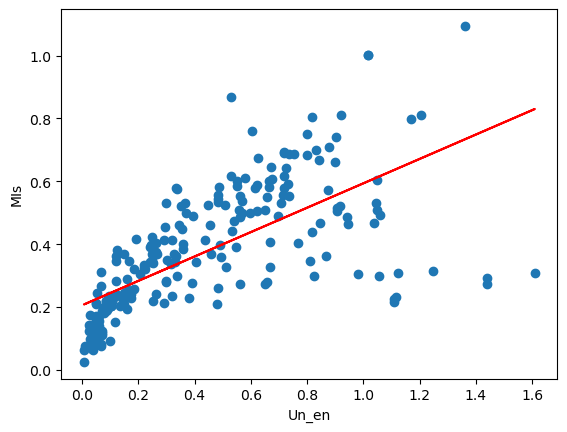

In [96]:
coefficients = np.polyfit(all_un, all_dis, 1)

# 拟合系数
slope = coefficients[0]
intercept = coefficients[1]

# 使用 poly1d 创建拟合函数
p = np.poly1d(coefficients)

# 计算拟合线的 y 值
all_dis_fit = p(all_un)

# 计算残差平方和（SS_res）
ss_res = np.sum((all_dis - all_dis_fit) ** 2)

# 计算总平方和（SS_tot）
ss_tot = np.sum((all_dis - np.mean(all_dis)) ** 2)

# 计算可决系数（R-squared）
r_squared = 1 - (ss_res / ss_tot)

# 打印拟合系数和可决系数
print(f"拟合系数：斜率（m）={slope}, 截距（b）={intercept}")
correlation_coefficient, p_value = pearsonr(all_un, all_dis)

print(f"可决系数（R-squared）：{r_squared}")
print(f"皮尔逊相关系数：{correlation_coefficient}")
print(f"p值：{p_value}")

# 绘制散点图
plt.scatter(all_un, all_dis)

# 绘制拟合线
plt.plot(all_un, all_dis_fit, color='red')

# 设置 x 轴和 y 轴标签
plt.xlabel("Un_en")
plt.ylabel("MIs")

# 显示图表
plt.show()